In [1]:
from pool_class import *

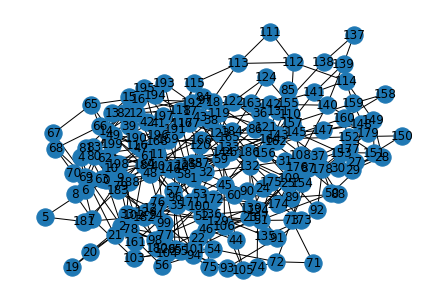

In [2]:
import networkx as nx 
n = 200
G = nx.connected_watts_strogatz_graph(n, k=4, p=0.4)
nx.draw(G, with_labels=True)
G0 = U.from_networkx(G)
edge_index = G0.edge_index
G0.x = torch.randn(n,3) # feature_size = 3
x = G0.x

In [22]:
pooling_layer = pooling(in_channels=x.shape[1], score_method='lin', p1=0.2, p2=0.95, aggregate_score_method='avg')
new_edge_index, new_adjacency_matrix, new_x, score_assignment_matrix, edge_index = pooling_layer.forward(edge_index, x)
original_x, origianl_edge_index = pooling_layer.unpool(new_x, score_assignment_matrix, edge_index)
print(original_x.shape)

torch.Size([200, 3])


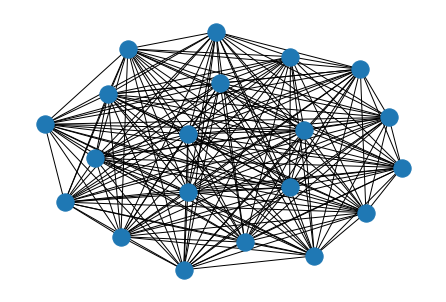

In [18]:
from torch_geometric.data import Data
data = Data(x=new_x, edge_index=new_edge_index)
G_new = U.to_networkx(data, to_undirected=True)
nx.draw(G_new)